## People Detection using YOLOv8

In this notebook, I learn how to
- load a video file.
- Extract frames.
- Use YOLOv8 to detect people.
- Draw bounding boxes on frames.

I use the [Ultralytics](https://github.com/ultralytics/ultralytics) YOLOv8 model.

### Environment Setup

In [1]:
# install ultralytics if not already installed
# run pip install ultralytics on the terminal

#import libraries
import cv2
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt


### Load the Model

In [2]:
# Load YOLOv8 pretrained model

model = YOLO("yolov8n.pt")  # You can change to yolov8s.pt, yolov8m.pt, etc. for different sizes

### Load the Video
This video is obtained from kaggle:
[cctv video](https://www.kaggle.com/datasets/aquila69420/cctv-footage)

In [3]:
#path to the video file

video_path = "./people.mp4"  # Change this to your video file path

# Check if the video file exists
assert os.path.exists(video_path), f"Video file {video_path} does not exist."

### Frame Extraction Function

In [4]:
def extractFrames(video_path, skip=1):
    """
    Extract frames from a video file.
    skip=1 extracts every frame, skip=2 extracts every second frame, etc.
    returns a list of (frame index, frame image) tuples
    """
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    frames = []
    index = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if index % skip == 0:
            frames.append((index, frame))
        index += 1
    cap.release()
    print(f"Original FPS: {fps}")
    return frames

### Extract Frames

In [5]:
frames = extractFrames(video_path, skip=1)
print(f"Extracted {len(frames)} frames from the video.")

Original FPS: 30.00073351426685
Extracted 409 frames from the video.


### Inference and Draw Bounding Boxes

In [6]:
def detect_and_annotate(frame, model, conf=0.3):

    """
    Run YOLOv8  detection on the frame and draw bounding box for person class.

    """
    results = model(frame)[0]

    annotated_frame = frame.copy()

    for result in results.boxes:
        cls_id = int(result.cls[0])
        conf_score = result.conf[0]
        label = model.names[cls_id]

        if label == "person" and conf_score > conf:

            # Box coordinates
            x1,y1,x2, y2 = result.xyxy[0]
            x1,y1,x2, y2 = int(x1), int(y1), int(x2), int(y2)

            # Draw rectangle
            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

            #label
            cv2.putText(annotated_frame,
                        f"{label} {conf_score:.2f}",
                        (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.6,
                        (0, 255, 0),
                        2
                        )
    return annotated_frame


### Process and Display Example Frame



0: 480x640 33 persons, 358.1ms
Speed: 13.1ms preprocess, 358.1ms inference, 13.6ms postprocess per image at shape (1, 3, 480, 640)
(480, 640, 3)


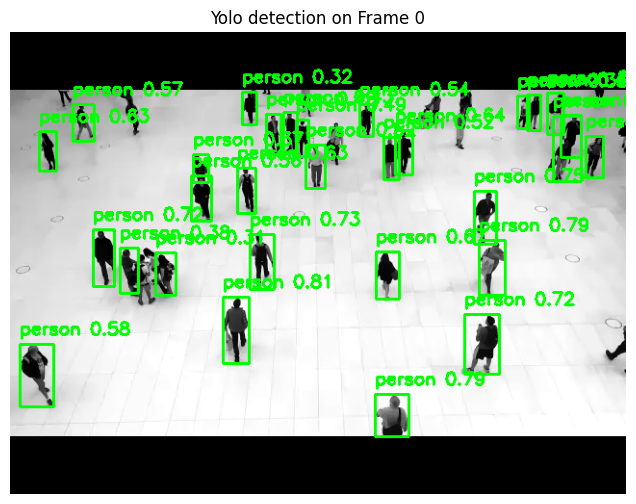

In [7]:
#Pick a frame to test

idx, frame = frames[0]

#detect and annotate the frame
annotated = detect_and_annotate(frame, model)

annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
print(annotated.shape)

#Display
plt.figure(figsize=(10, 6))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.title(f"Yolo detection on Frame {idx}")
plt.show()

### Save annotated frames to video

In [8]:
output_path = "annotated_output.avi"

fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for video writing
fps = 30
height, width, = frames[0][1].shape[:2]

print(height, width)
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

for idx, frame in frames:
    annotated = detect_and_annotate(frame, model)
    out.write(annotated)


out.release()


print(f"Annotated video saved to {output_path}")

480 640



0: 480x640 33 persons, 294.6ms
Speed: 8.2ms preprocess, 294.6ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 35 persons, 377.6ms
Speed: 3.4ms preprocess, 377.6ms inference, 3.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 37 persons, 1103.4ms
Speed: 11.5ms preprocess, 1103.4ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 37 persons, 396.5ms
Speed: 3.9ms preprocess, 396.5ms inference, 4.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 36 persons, 257.9ms
Speed: 6.6ms preprocess, 257.9ms inference, 4.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 35 persons, 321.3ms
Speed: 8.8ms preprocess, 321.3ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 40 persons, 235.2ms
Speed: 4.4ms preprocess, 235.2ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 38 persons, 372.8ms
Speed: 4.6ms preprocess, 372.8ms inference, 4.0ms postpr

### Conclusion and Next Steps

### Summary

- Extracted frames from video
- Detected people using YOLOv8
- Visualized and saved annotated output

### Next steps
- Experiment with different YOLOv8 models
- Adjust confidence thresholds.
- Deploy in real-time webcam inference.